In [1]:
# Header File

import numpy as np
import pandas as pd
import math
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os

In [2]:
# AdalineSGD

from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int
        Set random state for shuffling and initializing the weights.
        
    """
    def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=1, batchSize=1):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.batchSize = batchSize
        self.random_state = random_state
        if random_state:
            seed(random_state)
            
    # Done     
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        # Batch Num 
        numOfBatch = int(math.ceil(X.shape[0]/self.batchSize))
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            
            # Cost Func
            for idx in range(numOfBatch):
                prefix = idx * self.batchSize;
                postfix = (idx+1) * self.batchSize;
                if idx is (numOfBatch - 1):
                    postfix = X.shape[0]
                cost.append(self._update_weights(X[prefix:postfix,:], y[prefix:postfix]))
            avg_cost = sum(cost) / numOfBatch
            self.cost_.append(avg_cost)
        return self
    
    #Done
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    #Done
    def _initialize_weights(self, m):
        """Randomly initialize weights"""
        self.w_ = np.random.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    #Done    
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(xi)
        errors = (target - output)
        self.w_[1:] += self.eta * xi.T.dot(errors)
        self.w_[0] += self.eta * errors.sum()
        cost = 0.5 * (errors**2).sum() 
        return cost
    
    # Done 
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # Done 
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    # Done 
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
        

# Accuracy Rate & Figure

Misclassified samples(BatchSize 1): 1
Accuracy: 0.95
Misclassified samples(BatchSize 10): 1
Accuracy: 0.95
Misclassified samples(BatchSize 80): 1
Accuracy: 0.95


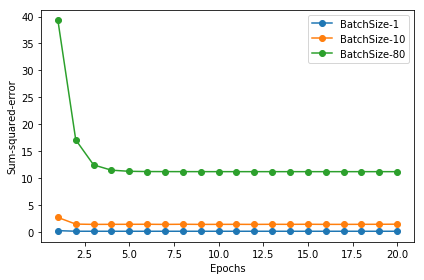

In [3]:
# Load DataSet & Data Processing 

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class label']

X = df[['Petal length', 'Petal width']].values
y = pd.factorize(df['Class label'])[0]

X = X[50:150]
y = np.where(y[50:150] == 2, -1, y[50:150])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


# Adaline SGD - 1
adas = AdalineSGD(n_iter=20, eta=0.01, random_state=1, batchSize=1)
adas.fit(X_train_std, y_train)

# Adaline SGD Figure with Different Size 

plt.plot(range(1, len(adas.cost_) + 1), adas.cost_, 
         marker='o', label='BatchSize-1')

# testing accuracy

y_pred = adas.predict(X_test_std)
print('Misclassified samples(BatchSize 1): %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))


# Adaline SGD - 10
adas = AdalineSGD(n_iter=20, eta=0.01, random_state=1, batchSize=10)
adas.fit(X_train_std, y_train)

# Adaline SGD Figure with Different Size 

plt.plot(range(1, len(adas.cost_) + 1), adas.cost_, 
         marker='o', label='BatchSize-10')

# testing accuracy

y_pred = adas.predict(X_test_std)
print('Misclassified samples(BatchSize 10): %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# Adaline SGD - 40
adas = AdalineSGD(n_iter=20, eta=0.01, random_state=1, batchSize=80)
adas.fit(X_train_std, y_train)

# testing accuracy

y_pred = adas.predict(X_test_std)
print('Misclassified samples(BatchSize 80): %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# Adaline SGD Figure with Different Size 


plt.plot(range(1, len(adas.cost_) + 1), adas.cost_, 
         marker='o', label='BatchSize-80')

plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig('./output/Lab04-1_104062232_0.png', dpi=300)
plt.show()



# Figure: Normalized

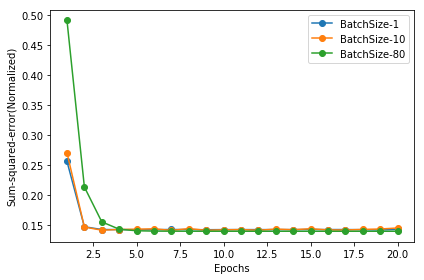

In [4]:
# Load DataSet & Data Processing 

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class label']

X = df[['Petal length', 'Petal width']].values
y = pd.factorize(df['Class label'])[0]

X = X[50:150]
y = np.where(y[50:150] == 2, -1, y[50:150])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


# Adaline SGD - 1
adas = AdalineSGD(n_iter=20, eta=0.01, random_state=1, batchSize=1)
adas.fit(X_train_std, y_train)

# Adaline SGD Figure with Different Size 

plt.plot(range(1, len(adas.cost_) + 1),  np.array(adas.cost_) , 
         marker='o', label='BatchSize-1')

# Adaline SGD - 10
adas = AdalineSGD(n_iter=20, eta=0.01, random_state=1, batchSize=10)
adas.fit(X_train_std, y_train)

# Adaline SGD Figure with Different Size 

plt.plot(range(1, len(adas.cost_) + 1),  np.array(adas.cost_) / 10, 
         marker='o', label='BatchSize-10')

# Adaline SGD - 40
adas = AdalineSGD(n_iter=20, eta=0.01, random_state=1, batchSize=80)
adas.fit(X_train_std, y_train)

# Adaline SGD Figure with Different Size 

plt.plot(range(1, len(adas.cost_) + 1),  np.array(adas.cost_) / 80, 
         marker='o', label='BatchSize-80')

plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error(Normalized)')
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig('./output/Lab04-1_104062232_1.png', dpi=300)
plt.show()

